In [1]:
#!pip install gradio

import gradio as gr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
df.size

18000

In [5]:
df.shape

(2000, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

1256

In [9]:
# Removing Duplicates

df2 = df.drop_duplicates()
df2.duplicated().sum()

0

In [10]:
df2.size

6696

In [11]:
df2.shape

(744, 9)

# Visualization

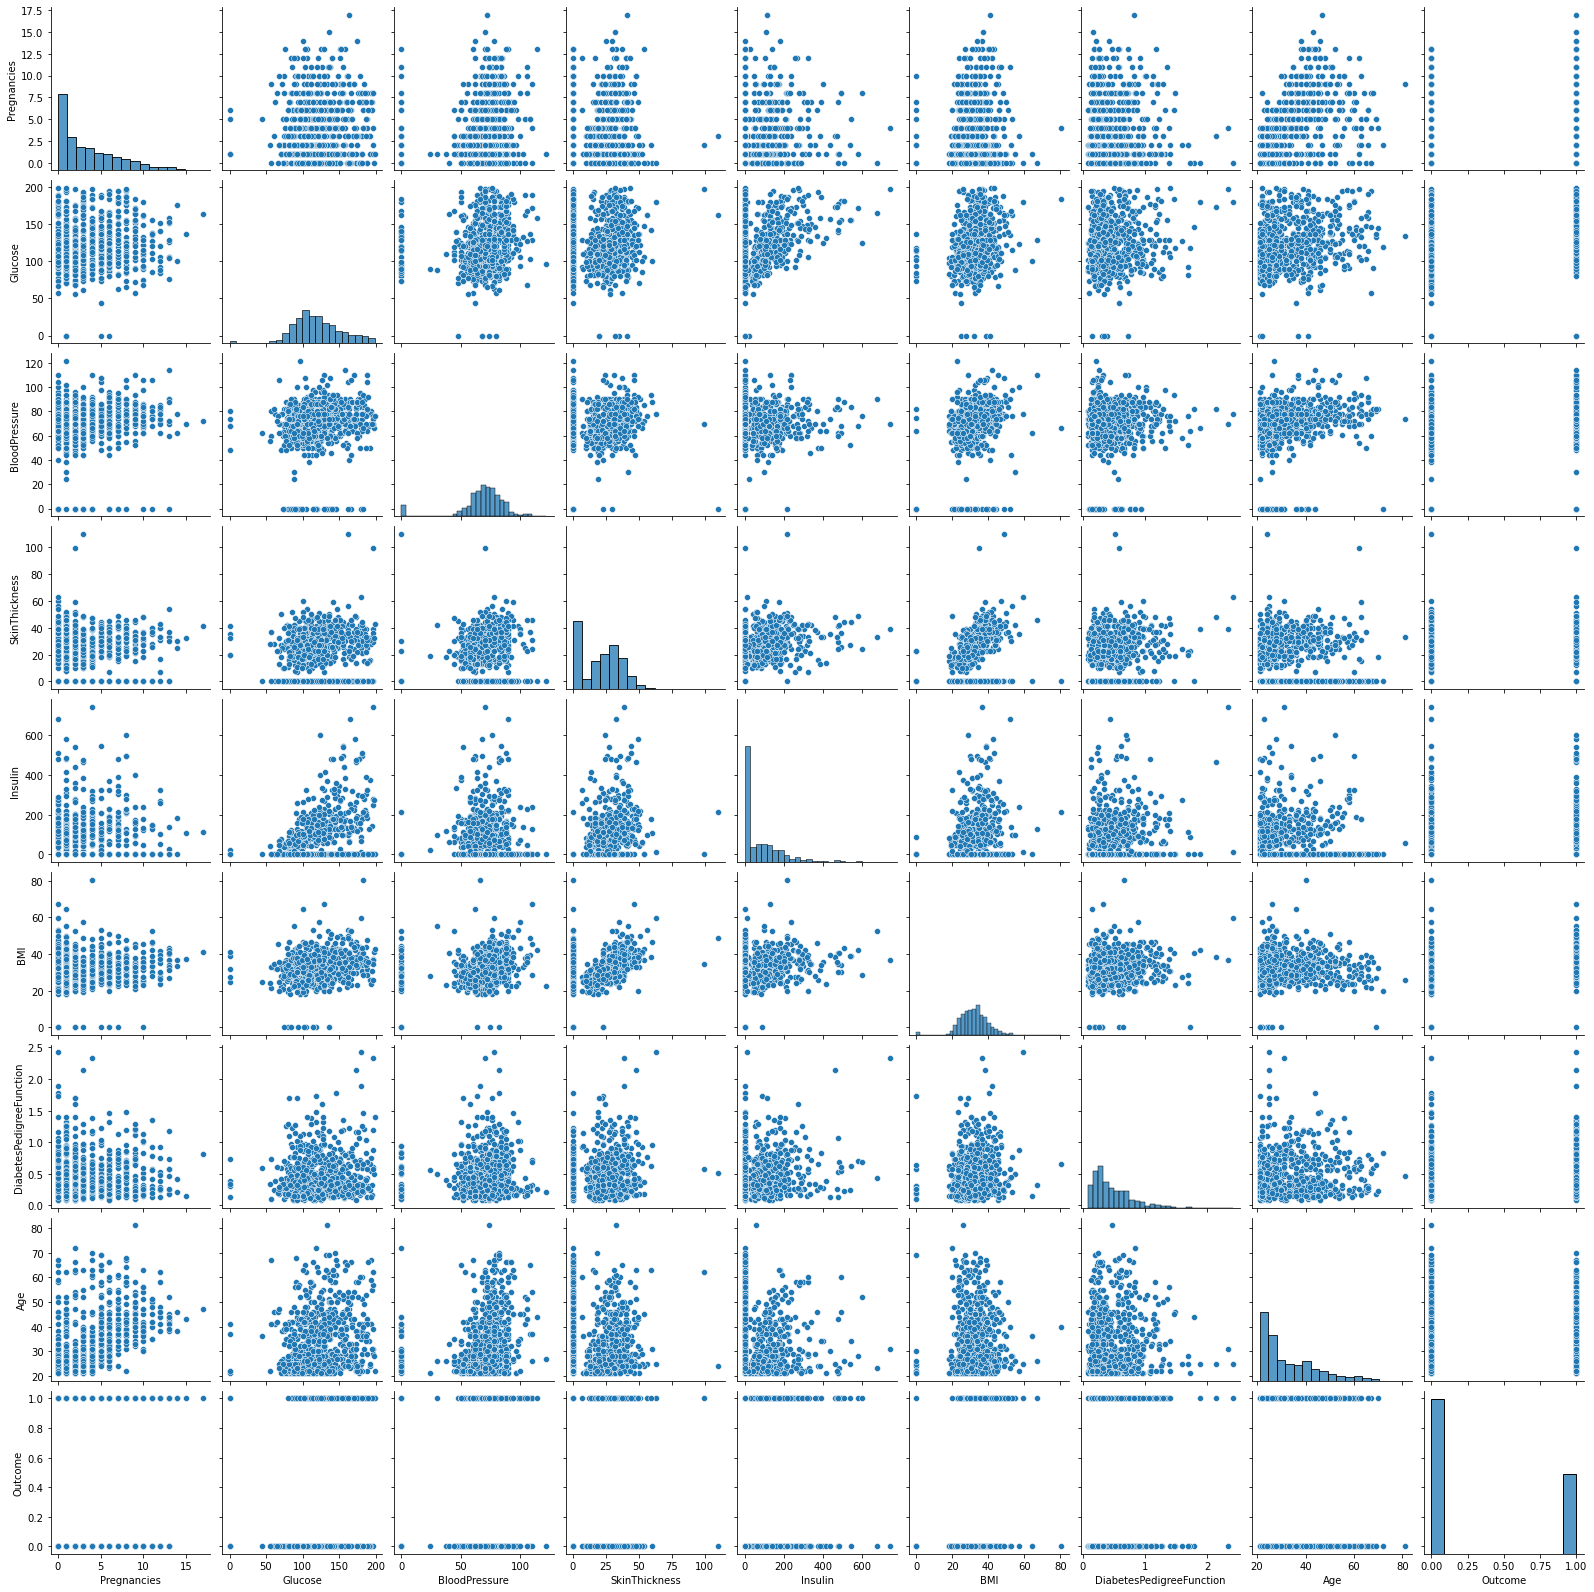

In [12]:
sns.pairplot(df2)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

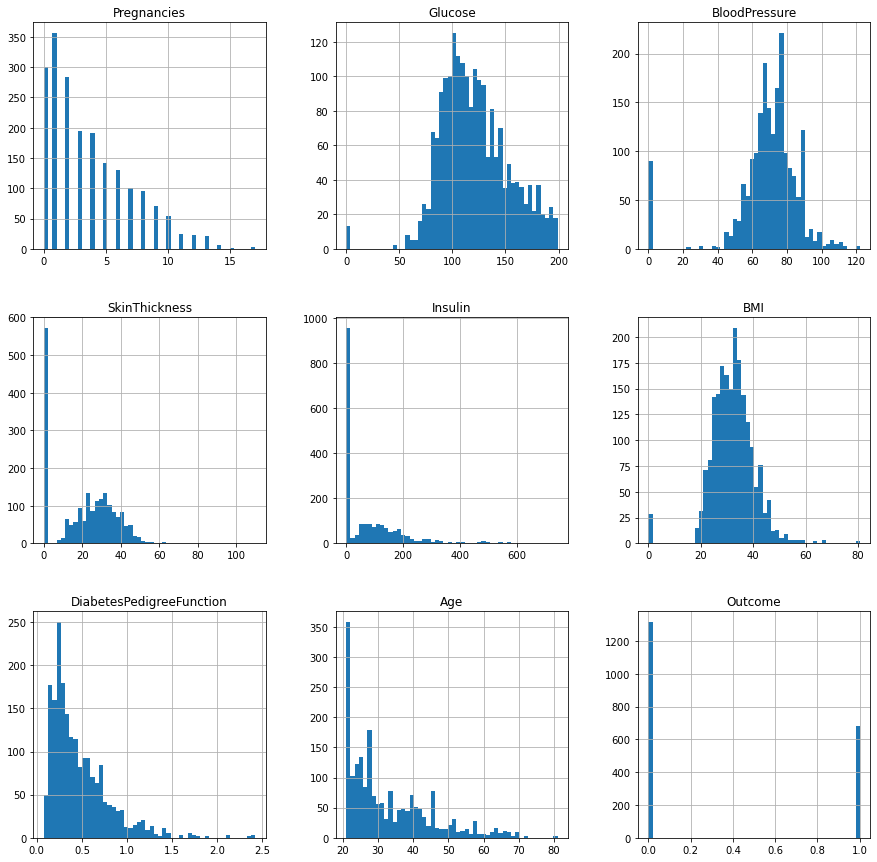

In [13]:
df.hist(bins=50, figsize=(15,15))

<AxesSubplot:xlabel='Outcome', ylabel='count'>

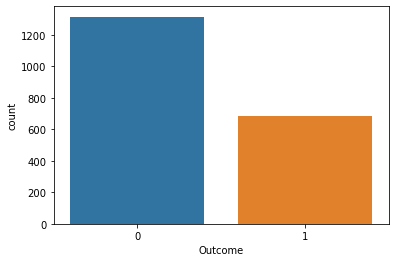

In [14]:
sns.countplot(data=df, x='Outcome')

# Splitting

In [15]:
x = df2.iloc[ : , :-1]
y = df2.iloc[ : , -1]

In [16]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1564,1,100,62,0,0,64.4,0.152,36
1565,0,163,40,23,64,40.7,0.322,33
1566,6,139,84,37,0,50.7,0.320,50
1567,2,167,44,30,140,52.7,0.452,28


In [17]:
x.shape

(744, 8)

In [18]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1564    0
1565    0
1566    1
1567    0
1568    0
Name: Outcome, Length: 744, dtype: int64

In [19]:
y.shape

(744,)

# Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# KNN

Text(0, 0.5, 'Error Rate')

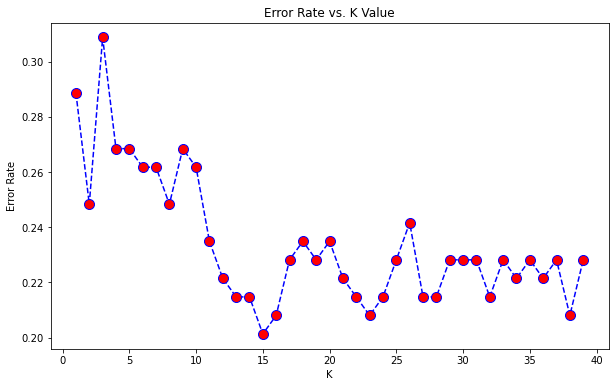

In [21]:
#Using elbow method to pick a good K Value
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
    
#Plot the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
#Training the K-NN model on the Training set

knn_classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

# Accuracy on training data
x_train_prediction = knn_classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)


# Accuracy on test data
x_test_prediction = knn_classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.7579831932773109
Accuracy on Test data :  0.7986577181208053


# Logistic Regression

In [23]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(x_train, y_train)


# Accuracy on training data
x_train_prediction = lr_classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)


# Accuracy on test data
x_test_prediction = lr_classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.7630252100840336
Accuracy on Test data :  0.8053691275167785


C:\Users\Kunal PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0, max_depth = 8)
dt_classifier.fit(x_train, y_train)

# Accuracy on training data
x_train_prediction = dt_classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)


# Accuracy on test data
x_test_prediction = dt_classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8873949579831932
Accuracy on Test data :  0.785234899328859


<AxesSubplot:>

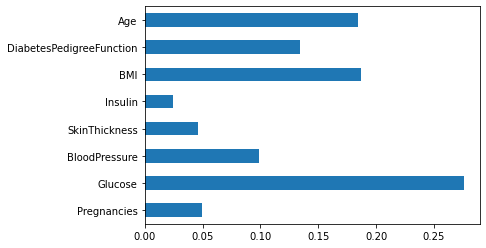

In [25]:
# Feature Importance of Decision Tree

feat_importances = pd.Series(dt_classifier.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state = 0, max_depth = 6)
rf_classifier.fit(x_train, y_train)

rf_pred = rf_classifier.predict(x_test)

# Accuracy on training data
x_train_prediction = rf_classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)


# Accuracy on test data
x_test_prediction = rf_classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.8974789915966387
Accuracy on Test data :  0.8053691275167785


<AxesSubplot:>

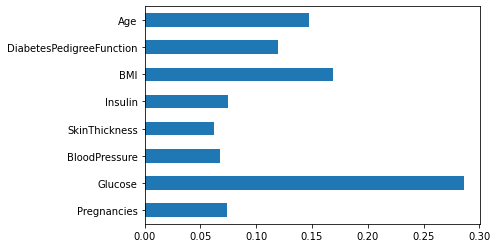

In [27]:
# Feature Importance of Random Forest

feat_importances = pd.Series(rf_classifier.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')

# SVM

In [28]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state = 0)
svm_classifier.fit(x_train, y_train)

svm_pred = svm_classifier.predict(x_test)

# Accuracy on training data
x_train_prediction = svm_classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)


# Accuracy on test data
x_test_prediction = svm_classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.7563025210084033
Accuracy on Test data :  0.7986577181208053


# Building a Predictive System

In [41]:
# input_data = ([[1, 139, 62, 41, 480, 40.7, 0.536, 21]])

# prediction = rf_classifier.predict(input_data)
# print(prediction)

# if (prediction[0]== 0):
#   print('The Person does not have Diabetes')
# else:
#   print('The Person has Diabetes')

In [38]:
def predict(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    
    input_data = ([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])
    prediction = rf_classifier.predict(input_data)

    if (prediction[0]== 0):
      return 'The Person does not have Diabetes'
    else:
      return 'The Person has Diabetes'

In [40]:
iface = gr.Interface(
    fn=predict,
    inputs=["text", "text", "text", "text", "text", "text", "text", "text"],
    outputs=["text"]
)

iface.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x15d2e141970>, 'http://127.0.0.1:7866/', None)

[0]
